In [1]:
#import semua module yg dibutuhkan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# menambil dataset dan meninjau file dataset
data_path = '[Dataset]_(Viral_Konten_MedSos).csv'
data = pd.read_csv(data_path)

print(data.head())
print(data.info())

#untuk cek value yang hilang
print(data.isnull().sum())


                                                 url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                   0.815385         4.0     

In [2]:
#membersihkan whitespace yang ada pada kolom url
data['url'] = data['url'].str.replace(r'\s+', '', regex=True)

#menampilkan data yang sudah dibersihkan
print(data.head())

                                                 url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                   0.815385         4.0     

In [3]:
# menormalisasi data

# Mengkategorikan jumlah shares
def categorize_shares(shares):
    if shares < 1000:
        return 'Low'
    elif shares < 10000:
        return 'Medium'
    else:
        return 'High'

data['shares_category'] = data[' shares'].apply(categorize_shares)

# Untuk memilih kolom numerik yang akan dinormalisasi
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
X = data[numeric_columns].drop(columns=[' shares'])
y = data['shares_category']

# Memastikan tidak ada nilai NaN
X = X.fillna(0)

# Menggunakan MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Encode target labels dengan LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

#menampilkan data yg sudah di normalisasi
print(data[numeric_columns].head())

   timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
0      731.0            12.0             219.0         0.663594   
1      731.0             9.0             255.0         0.604743   
2      731.0             9.0             211.0         0.575130   
3      731.0             9.0             531.0         0.503788   
4      731.0            13.0            1072.0         0.415646   

   n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  \
0               1.0                  0.815385        4.0             2.0   
1               1.0                  0.791946        3.0             1.0   
2               1.0                  0.663866        3.0             1.0   
3               1.0                  0.665635        9.0             0.0   
4               1.0                  0.540890       19.0            19.0   

   num_imgs  num_videos  ...  min_positive_polarity  max_positive_polarity  \
0       1.0         0.0  ...               0.100000           

Columns in the dataset: Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivit

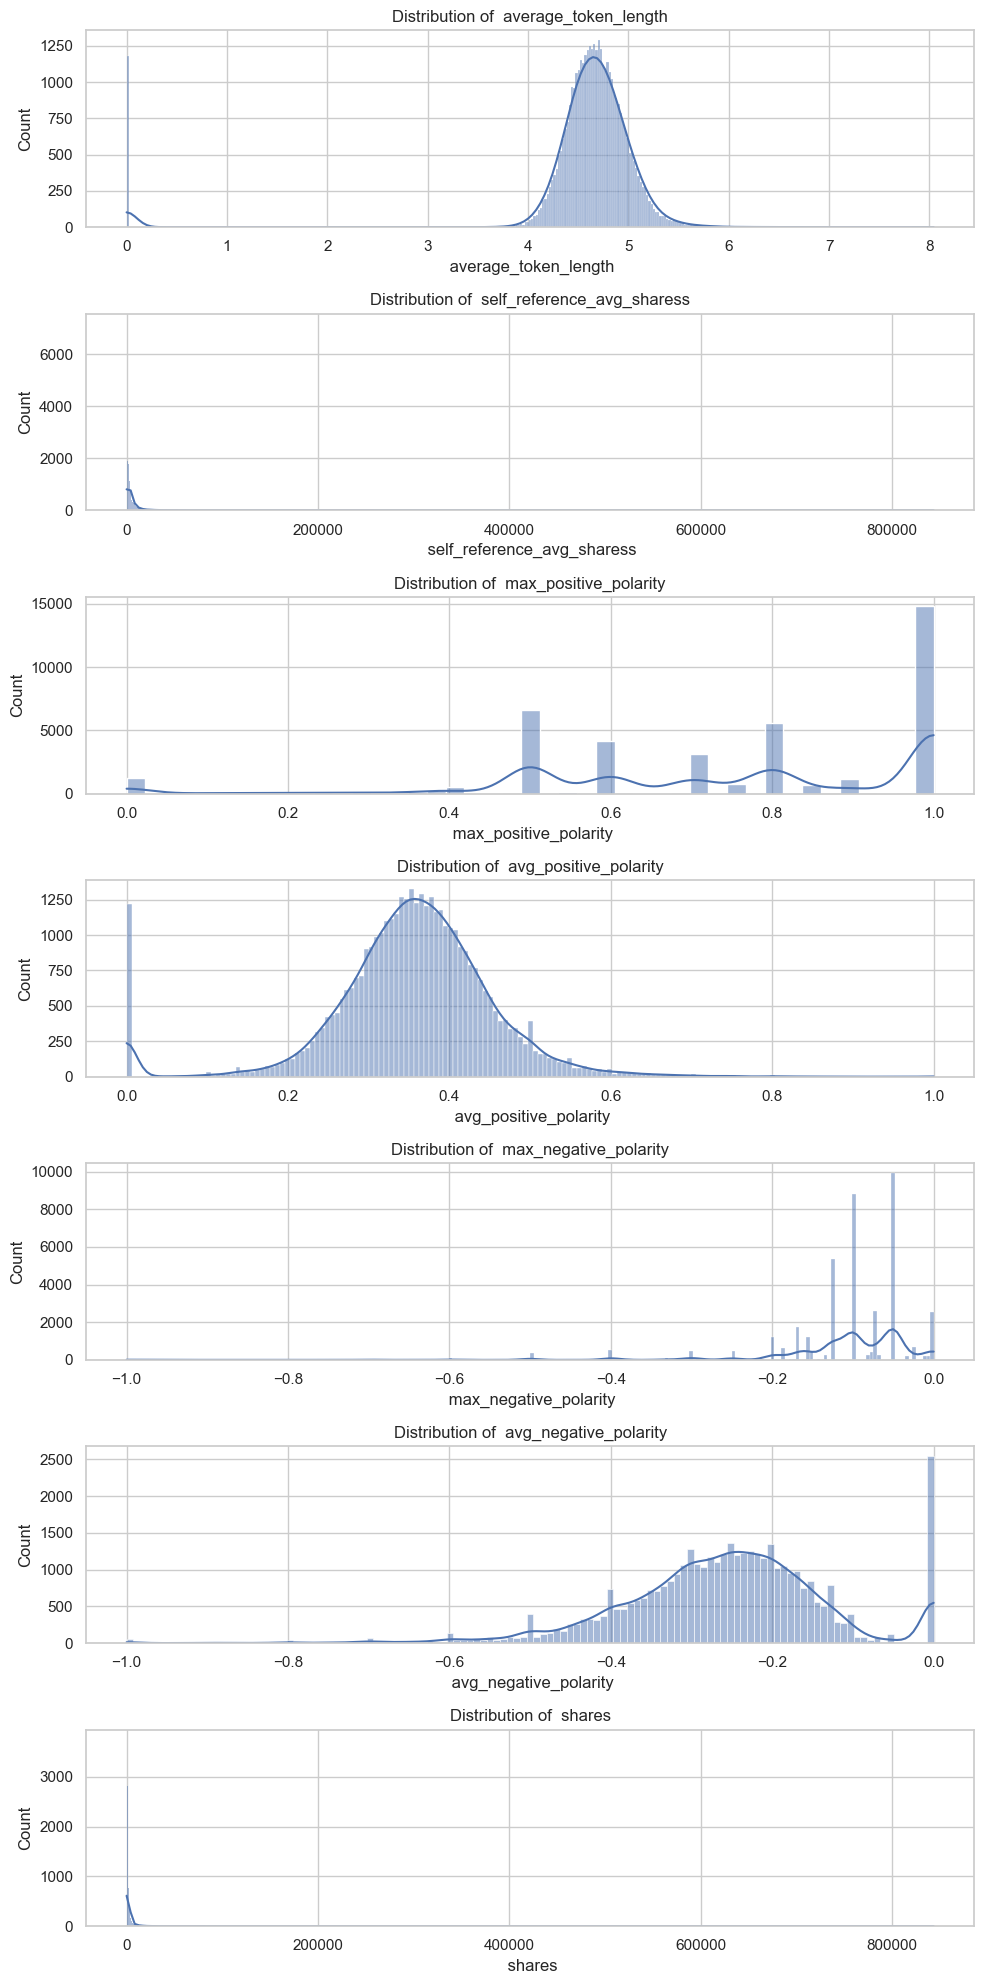

In [4]:
# Menampilkan semua nama kolom dalam dataset
print("Columns in the dataset:", data.columns)

#Pembuatan grafik visualisasi data
sns.set(style="whitegrid")

#menyimpan nama kolom yang akan di visualisasi
num_cols = [' average_token_length', ' self_reference_avg_sharess', ' max_positive_polarity', ' avg_positive_polarity',' max_negative_polarity', ' avg_negative_polarity', ' shares']

# Memeriksa apakah kolom yang disebutkan ada dalam dataset
for col in num_cols:
    if col not in data.columns:
        print(f"Kolom {col} tidak ada dalam dataset")

# Membuat visualisasi distribusi
fig, axes = plt.subplots(len(num_cols), 1, figsize=(10, 20))

for i, col in enumerate(num_cols):
    if col in data.columns:
        sns.histplot(data[col], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
    else:
        axes[i].set_title(f'{col} not found in dataset')
        axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Membuat model neural network
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)

# Memprediksi data uji
y_pred_nn = nn_model.predict(X_test)

# Menghitung MSE
mse_nn = mean_squared_error(y_test, y_pred_nn)
print(f'MSE Neural Network: {mse_nn}')


In [ ]:
# Menghitung metrik evaluasi
conf_matrix = confusion_matrix(y_test, y_pred_nn)
accuracy = accuracy_score(y_test, y_pred_nn)
precision = precision_score(y_test, y_pred_nn, average='weighted')
recall = recall_score(y_test, y_pred_nn, average='weighted')

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

In [ ]:
# Fungsi untuk memprediksi kategori shares dan mengembalikan akurasi model
def predict_shares_category_with_accuracy(sample_data):
    # Memastikan bahwa semua kolom ada dalam data sampel
    sample_df = pd.DataFrame(sample_data)
    sample_df = sample_df.reindex(columns=numeric_columns, fill_value=0)
    
    # Melakukan normalisasi pada data sampel
    sample_scaled = scaler.transform(sample_df)
    
    # Melakukan prediksi
    sample_pred = nn_model.predict(sample_scaled)
    sample_pred_label = label_encoder.inverse_transform(sample_pred)
    
    return sample_pred_label[0], accuracy

# Contoh Skenario
sample_data_shares = {
    ' n_tokens_title': [10],
    ' n_tokens_content': [500],
    ' n_unique_tokens': [0.5],
    ' n_non_stop_words': [1.0],
    ' n_non_stop_unique_tokens': [0.5],
    ' num_hrefs': [4],
    ' num_self_hrefs': [2],
    ' num_imgs': [1],
    ' num_videos': [0],
    ' average_token_length': [4.5],
    ' num_keywords': [5],
    ' data_channel_is_lifestyle': [0],
    ' data_channel_is_entertainment': [1],
    ' data_channel_is_bus': [0],
    ' data_channel_is_socmed': [0],
    ' data_channel_is_tech': [0],
    ' data_channel_is_world': [0],
    ' kw_min_min': [-1.0],
    ' kw_max_min': [1.0],
    ' kw_avg_min': [0.5],
    ' kw_min_max': [1.0],
    ' kw_max_max': [3.0],
    ' kw_avg_max': [2.0],
    ' kw_min_avg': [0.5],
    ' kw_max_avg': [2.5],
    ' kw_avg_avg': [1.0],
    ' self_reference_min_shares': [100],
    ' self_reference_max_shares': [1000],
    ' self_reference_avg_sharess': [0.5],
    ' weekday_is_monday': [1],
    ' weekday_is_tuesday': [0],
    ' weekday_is_wednesday': [0],
    ' weekday_is_thursday': [0],
    ' weekday_is_friday': [0],
    ' weekday_is_saturday': [0],
    ' weekday_is_sunday': [0],
    ' is_weekend': [0],
    ' global_subjectivity': [0.5],
    ' global_sentiment_polarity': [0.1],
    ' global_rate_positive_words': [0.05],
    ' global_rate_negative_words': [0.01],
    ' rate_positive_words': [0.1],
    ' rate_negative_words': [0.02],
    ' avg_positive_polarity': [0.2],
    ' min_positive_polarity': [0.1],
    ' max_positive_polarity': [0.5],
    ' avg_negative_polarity': [-0.1],
    ' min_negative_polarity': [-0.2],
    ' max_negative_polarity': [-0.1],
    ' title_subjectivity': [0.0],
    ' title_sentiment_polarity': [0.1],
    ' abs_title_subjectivity': [0.0],
    ' abs_title_sentiment_polarity': [0.1],
    ' shares': [30]
}

# Memprediksi kategori shares berdasarkan data sampel & akurasinya
predicted_category, model_accuracy = predict_shares_category_with_accuracy(sample_data_shares)

print(f"Predicted The Content Viral Level: {predicted_category}")
print(f"Model Accuracy: {model_accuracy * 100:.2f}%")
